# I] Import and download

In [13]:
import pandas, numpy
import scipy, scipy.signal
import matplotlib, matplotlib.pyplot as plt

In [14]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [15]:
%%time
#DL data ATG7 isoform expression
path = output_file_directory + "ATG7/TCGA_GTEX/all_tissues/dataframes_for_input/df_ATG7_NormPrim_all.csv"
df_ATG7_NormPrim= pandas.read_csv(path, sep = ",")

#remove Survival information
df_ATG7_NormPrim.drop(df_ATG7_NormPrim.columns[[3, 4]], axis = 1, inplace = True)

print(df_ATG7_NormPrim.shape)
df_ATG7_NormPrim.head(2)

(16179, 20)
Wall time: 75.8 ms


,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-ZTTD-0326-SM-57WFW,Normal Tissue,Muscle,5.042,3.860,2.390,0.2642,32.944283,14.519306,5.240574,1.199970,5.085097,3.955992,2.641679,20.95985,69.271996,25.002916,5.725088,0.440723,0.159074
1,GTEX-PX3G-1626-SM-2S1PT,Normal Tissue,Muscle,4.252,2.322,1.956,1.1320,19.052710,4.999249,3.878848,2.190624,4.325725,2.584782,2.286540,11.06872,45.165557,35.043325,19.791118,0.262390,0.203585


In [16]:
#split to have Normal (GTEX) and Primary (TCGA)
df_ATG7_Normal = df_ATG7_NormPrim[df_ATG7_NormPrim['sample'].str.startswith('GTEX')]
print(len(df_ATG7_Normal))
df_ATG7_Primary = df_ATG7_NormPrim[df_ATG7_NormPrim['sample'].str.startswith('TCGA')]
print(len(df_ATG7_Primary))

7401
8778


In [8]:
%%time
# DL data gene expression for Normal Tissue and Primary Tumors
path = output_file_directory + "dataframes_for_input/"
ensembl_normal_protcoding = pandas.read_csv(path+"ensembl_normal_protcoding_expr.tsv", sep = "\t")
ensembl_primary_protcoding = pandas.read_csv(path+"ensembl_primary_protcoding_expr.tsv", sep = "\t")

print(ensembl_normal_protcoding.shape)
print(ensembl_primary_protcoding.shape)

ensembl_normal_protcoding.head()

(7429, 19383)
(9185, 19383)
Wall time: 3min 35s


,sample,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,GTEX-1117F-0226-SM-5GZZ7,13.1350,12.6215,12.6246,12.8384,13.9763,13.1286,13.5276,11.9137,12.0779,...,4.2840,5.3992,5.3851,4.6247,4.8258,5.4912,3.1294,5.6224,4.5663,6.4249
1,GTEX-1117F-0426-SM-5EGHI,14.6712,14.2931,14.5995,14.7048,15.7851,15.3795,15.3725,13.0616,13.6227,...,7.7997,4.4357,4.5802,1.5563,4.8365,6.3473,2.4597,6.6948,0.8568,2.8055
2,GTEX-1117F-0526-SM-5EGHJ,12.8924,12.6612,12.5008,12.8456,13.9252,13.3517,13.4492,11.6795,12.2196,...,0.5568,5.1692,4.7010,2.8522,5.6065,4.9801,2.1411,4.9824,2.4675,5.5500
3,GTEX-1117F-0626-SM-5N9CS,12.6263,13.0833,11.3334,12.6928,14.1037,13.4508,13.2862,12.9488,12.1293,...,2.7292,5.9507,5.6177,1.4441,5.1392,5.2791,2.5707,5.7211,4.1780,6.3669
4,GTEX-1117F-0726-SM-5GIEN,13.8339,14.1782,15.3590,14.8495,16.3241,16.1573,15.4759,14.3121,14.4320,...,9.0834,5.1086,4.6095,2.5948,3.9947,4.6849,2.3135,5.0000,4.0091,3.9421


In [9]:
%%time
# transform Normal data to tpm + 1
ensembl_normal_protcoding.set_index('sample', inplace = True)  
ensembl_primary_protcoding.set_index('sample', inplace = True)  

# transform Normal data to tpm + 1   
print(f'NORMAL \nmin inlog2(tpm+0.001) : {ensembl_normal_protcoding.min().min()}')
ensembl_normal_protcoding = ((2**ensembl_normal_protcoding) - 0.001) + 1
print(f'min in tpm+1 : {ensembl_normal_protcoding.min().min()}')
ensembl_normal_protcoding = numpy.log2(ensembl_normal_protcoding) 
print(f'min in log2(tpm+1) : {ensembl_normal_protcoding.min().min()}')

# transform Primary data to tpm + 1   
print(f'PRIMARY \nmin inlog2(tpm+0.001) : {ensembl_primary_protcoding.min().min()}')
ensembl_primary_protcoding = ((2**ensembl_primary_protcoding) - 0.001) + 1
print(f'min in tpm+1 : {ensembl_primary_protcoding.min().min()}')
ensembl_primary_protcoding = numpy.log2(ensembl_primary_protcoding) 
print(f'min in log2(tpm+1) : {ensembl_primary_protcoding.min().min()}')

ensembl_normal_protcoding.head(2)

NORMAL 
min inlog2(tpm+0.001) : -9.9658
min in tpm+1 : 0.9999999891070172
min in log2(tpm+1) : -1.5715252422426845e-08
PRIMARY 
min inlog2(tpm+0.001) : -9.9658
min in tpm+1 : 0.9999999891070172
min in log2(tpm+1) : -1.5715252422426845e-08
Wall time: 7.54 s


,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
sample,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-0226-SM-5GZZ7,13.135160,12.621729,12.624828,12.838597,13.976389,13.128761,13.527722,11.914074,12.078233,12.530644,...,4.356148,5.432954,5.419182,4.681969,4.875745,5.522892,3.285359,5.651364,4.625886,6.441578
GTEX-1117F-0426-SM-5EGHI,14.671255,14.293172,14.599558,14.704854,15.785126,15.379534,15.372534,13.061769,13.622814,14.297172,...,7.806154,4.500807,4.639227,1.978191,4.886082,6.364894,2.700445,6.708646,1.490579,2.998197


In [10]:
#remove gene where the maximum is lower than 10 TPM 
dfs =  ensembl_normal_protcoding, ensembl_primary_protcoding
infos = 'normal', 'primary'

df_L = []
for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    
    print(f'\n {info.upper()} \nshape is: {df.shape}')
    #remove gene where the maximum is lower than 10 TPM 
    max_number_log2_tpm_p1 = 3.322
    df = df.loc[:, (df.max() > max_number_log2_tpm_p1)]
    print(f'minimum of the max expression is {df.max().min()} [log2(tpm+1)]')
    print(f'new shape is: {df.shape}')
    df_L.append(df)

ensembl_normal_protcoding = df_L[0].T
ensembl_primary_protcoding = df_L[1].T


 NORMAL 
shape is: (7429, 19382)
minimum of the max expression is 3.3233815747991775 [log2(tpm+1)]
new shape is: (7429, 17993)

 PRIMARY 
shape is: (9185, 19382)
minimum of the max expression is 3.3233815747991775 [log2(tpm+1)]
new shape is: (9185, 18248)


In [102]:
ensembl_normal_protcoding.head()

sample,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2226-SM-5N9CH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-3026-SM-5GZYU,...,GTEX-ZZPU-0726-SM-5N9C8,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
ENSG00000198888,13.135160,14.671255,12.892590,12.626528,13.833999,13.796301,10.462722,11.971959,14.579059,13.647612,...,12.856694,14.807350,14.324070,14.077683,14.160279,13.710608,12.875992,12.543841,14.608858,14.322870
ENSG00000198763,12.621729,14.293172,12.661422,13.083466,14.178278,13.815800,11.522490,12.455857,14.316871,12.911187,...,13.035472,14.654956,14.349269,14.271173,14.381068,14.243274,13.394134,12.824699,14.249174,14.383067
ENSG00000198804,12.624828,14.599558,12.501049,11.333958,15.359034,12.269492,10.351304,11.283978,13.617715,14.068484,...,13.396634,15.990122,15.275036,15.172639,14.855149,14.608458,13.524222,14.093182,15.529030,14.397067
ENSG00000198712,12.838597,14.704854,12.845796,12.693018,14.849549,13.460228,11.164428,12.173512,13.765803,13.974990,...,13.360737,15.377334,14.987344,14.652856,14.776051,14.834049,13.438830,14.168778,15.161439,14.372868
ENSG00000228253,13.976389,15.785126,13.925293,14.103782,16.324118,15.393233,12.921886,13.742005,15.662428,14.605158,...,14.311871,16.423816,15.525131,15.884424,15.810425,15.494831,14.917247,14.816350,16.016622,15.288736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000181817,5.522892,6.364894,5.025057,5.315748,4.739872,4.968581,5.035139,5.190226,4.799120,4.966258,...,3.946732,4.912178,4.550264,4.655933,4.418902,5.800887,4.798541,4.091708,6.201617,5.269361
ENSG00000116885,3.285359,2.700445,2.435624,2.794931,2.577701,2.157052,3.522325,3.907863,2.698245,3.943926,...,2.241870,2.339109,3.270559,4.393651,2.632277,3.467278,4.056620,2.097584,2.195377,3.147295
ENSG00000116898,5.651364,6.708646,5.027286,5.748167,5.044350,5.228075,5.309606,5.405608,5.586804,5.428949,...,4.781866,5.988677,5.976572,5.439597,5.433931,5.862978,4.921751,5.564677,6.608843,6.371710
ENSG00000119535,4.625886,1.490579,2.707049,4.255503,4.095945,4.901061,5.541971,3.894333,5.554008,4.244133,...,1.659925,2.510989,3.264554,3.189072,1.815578,1.875795,1.903037,1.111049,1.176340,4.463359


In [11]:
# find max
print(ensembl_normal_protcoding.max().max())
print(ensembl_primary_protcoding.max().max())

18.985002777698735
17.89430591586269


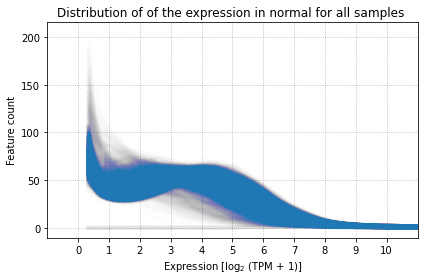

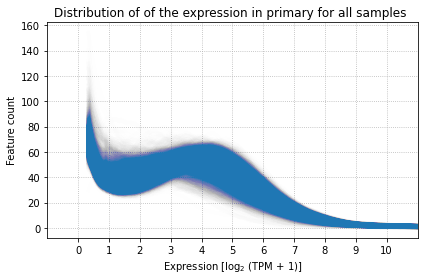

Wall time: 1min 3s


In [147]:
%%time
#show everything. All the samples 
found_max = 19
#means 50 dots per bins
resolution = 50
number_of_bins = found_max * resolution
absolute_max = 0
#remove at extremities
margin = int(resolution/3)

dfs = ensembl_normal_protcoding, ensembl_primary_protcoding
infos = "normal", "primary"

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]  

    for sample in df.columns:
        expression_values = df.loc[:, sample]

        # histogram
        hist, bin_edges = numpy.histogram(expression_values, bins=number_of_bins, range=(0, found_max))
        half_bin = (bin_edges[1] - bin_edges[0])/2
        x = bin_edges + half_bin
        x = x[:-1]

        # curve fitting - smooth
        plotting_x = x[margin:-margin]
        plotting_hist = hist[margin:-margin]
        yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
        
        # plotting
        plt.plot(plotting_x, yhat, '-', lw=4, alpha=1/300, color='tab:blue')

    plt.xlim(-1, 11)                  
    plt.xticks(range(0, 10+1))
    plt.title(f'Distribution of of the expression in {info} for all samples ')
    plt.xlabel('Expression [log$_2$ (TPM + 1)]')
    plt.ylabel('Feature count')
    plt.grid(ls=':')
    plt.tight_layout()
    plt.show()
    plt.close()

7429


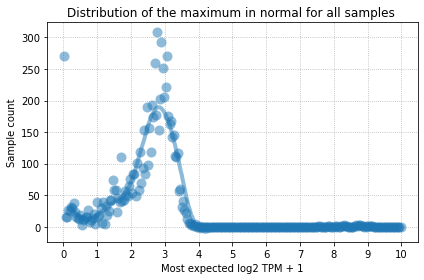

9185


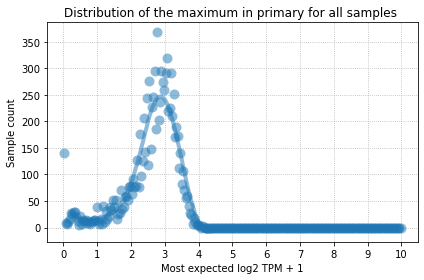

Wall time: 27.9 s


In [155]:
%%time
#Plot the maximum of expression to find a communal pattern among samples
#because we saw bad sample in the beginning until 1. I remove the 50 values first with margin

found_max = 19
# means 50 dots per bins (betweeen 0 and 1)
resolution = 50
number_of_bins = found_max * resolution
absolute_max = 0

dfs = ensembl_normal_protcoding, ensembl_primary_protcoding
infos = "normal", "primary"

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]  
    
    most_likely_expressions = []
    for sample in df.columns:
        expression_values = df.loc[:, sample]

        # histogram of all sample (without the beginning of the values = no pic at 0)
        hist, bin_edges = numpy.histogram(expression_values, bins=number_of_bins, range=(0, found_max))
        half_bin = (bin_edges[1] - bin_edges[0])/2
        x = bin_edges + half_bin
        x = x[:-1]
        
        # curve fitting
        margin = 50
        plotting_x = x[margin:-margin]
        plotting_hist = hist[margin:-margin]
        yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
        
        # To visualize the communal pattern in samples : maximum of all samples 
        ## argmax gives position of the max.
        most_likely_expression = x[numpy.argmax(yhat)]
        most_likely_expressions.append(most_likely_expression)
        
    # histogram of the maximum value of all samples
    print(len(most_likely_expressions))
    hist, bin_edges = numpy.histogram(most_likely_expressions, bins=250, range=(0, 10))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]

    # curve fitting
    margin = 5
    plotting_x = x[margin:-margin]
    plotting_hist = hist[margin:-margin]
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)

    #plot
    plt.plot(x, hist, 'o', color='tab:blue', alpha=1/2, markeredgecolor='None', markersize=10)
    plt.plot(plotting_x, yhat, '-', lw=4, alpha=1/2, color='tab:blue')

    plt.xticks(range(0, 11))
    plt.grid(ls=':')
    plt.title(f'Distribution of the maximum in {info} for all samples ')
    plt.xlabel('Most expected log2 TPM + 1')
    plt.ylabel('Sample count')
    plt.tight_layout()
    plt.show()
    plt.close()

In [158]:
print('The communal pattern of the maximal is mainly between 1.8 and 3.8 in the two groups')

Maximal is mainly between 2 and 4


In [165]:
%%time
# We want to select only the samples following the pattern.

found_max = 19
#means 50 dots per bins
resolution = 50
number_of_bins = found_max * resolution
absolute_max = 0
margin = 50

dfs = ensembl_normal_protcoding, ensembl_primary_protcoding
infos = "normal", "primary"

selected_expressions = []

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    
    print(info)
    selected_samples = []
    
    for sample in df.columns:
        expression_values = df.loc[:, sample]

        # histogram
        hist, bin_edges = numpy.histogram(expression_values, bins=number_of_bins, range=(0, found_max))
        half_bin = (bin_edges[1] - bin_edges[0])/2
        x = bin_edges + half_bin
        x = x[:-1]

        # curve fitting - smooth
        plotting_x = x[margin:-margin]
        plotting_hist = hist[margin:-margin]
        yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
        
        # determine most likely expression
        ## argmax gives position of the max. This is to select samples with max at this range
        most_likely_expression = x[numpy.argmax(yhat)]

        # sample selection. Where max is between 1.8 and 4.
        if 1.8 <= most_likely_expression <= 4:
            selected_samples.append(sample)
            
    selected_expression = df.loc[:, selected_samples]
    print(selected_expression.shape)
    selected_expressions.append(selected_expression)

# create the new dataframe
selected_expr_normal = selected_expressions[0]
selected_expr_primary = selected_expressions[1]
selected_expr_normal.head(3)

normal
(17993, 5922)
primary
(18248, 8065)
Wall time: 30.1 s


sample,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2226-SM-5N9CH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-3026-SM-5GZYU,...,GTEX-ZZPU-0326-SM-5N9BJ,GTEX-ZZPU-0526-SM-5E44U,GTEX-ZZPU-0726-SM-5N9C8,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2726-SM-5NQ8O
ENSG00000198888,13.135160,14.671255,12.892590,12.626528,13.833999,13.796301,10.462722,11.971959,14.579059,13.647612,...,13.630914,13.258647,12.856694,14.807350,14.324070,14.077683,13.710608,12.875992,12.543841,14.322870
ENSG00000198763,12.621729,14.293172,12.661422,13.083466,14.178278,13.815800,11.522490,12.455857,14.316871,12.911187,...,13.608215,13.410832,13.035472,14.654956,14.349269,14.271173,14.243274,13.394134,12.824699,14.383067
ENSG00000198804,12.624828,14.599558,12.501049,11.333958,15.359034,12.269492,10.351304,11.283978,13.617715,14.068484,...,13.964490,13.839598,13.396634,15.990122,15.275036,15.172639,14.608458,13.524222,14.093182,14.397067


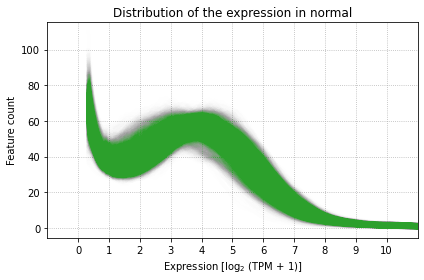

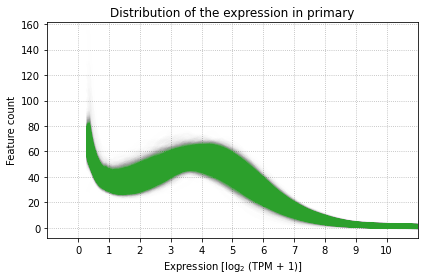

Wall time: 56.8 s


In [167]:
%%time
#Plot the distribution of the selected samples
found_max = 19
#means 50 dots per bins
resolution = 50
number_of_bins = found_max * resolution
absolute_max = 0
#remove at extremities
margin = int(resolution/3)

dfs = selected_expr_normal, selected_expr_primary
infos = "normal", "primary"

most_likely_expressions = []
selected_samples = []

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]  

    for sample in df.columns:
        expression_values = df.loc[:, sample]

        # histogram
        hist, bin_edges = numpy.histogram(expression_values, bins=number_of_bins, range=(0, found_max))
        half_bin = (bin_edges[1] - bin_edges[0])/2
        x = bin_edges + half_bin
        x = x[:-1]

        # curve fitting - smooth
        plotting_x = x[margin:-margin]
        plotting_hist = hist[margin:-margin]
        yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
               
        # plotting
        plt.plot(plotting_x, yhat, '-', lw=4, alpha=1/300, color='tab:green')

    plt.xlim(-1, 11)                  
    plt.xticks(range(0, 10+1))
    plt.title(f'Distribution of the expression in {info}')
    plt.xlabel('Expression [log$_2$ (TPM + 1)]')
    plt.ylabel('Feature count')
    plt.grid(ls=':')
    plt.tight_layout()
    plt.show()
    plt.close()

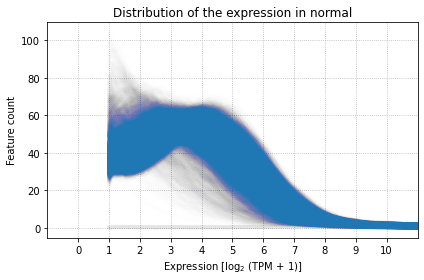

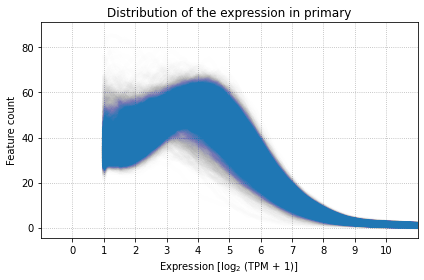

Wall time: 1min


In [105]:
%%time
#because we saw bad sample in the beginning until 1. I remove 50 (= 0 to 1 because resolution = 50)
found_max = 19
#means 50 dots per bins
resolution = 50
number_of_bins = found_max * resolution
absolute_max = 0
#remove at extremities
margin = 50

dfs = ensembl_normal_protcoding, ensembl_primary_protcoding
infos = "normal", "primary"

most_likely_expressions = []
selected_samples = []

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]  

    for sample in df.columns:
        expression_values = df.loc[:, sample]

        # histogram
        hist, bin_edges = numpy.histogram(expression_values, bins=number_of_bins, range=(0, found_max))
        half_bin = (bin_edges[1] - bin_edges[0])/2
        x = bin_edges + half_bin
        x = x[:-1]

        # curve fitting - smooth
        plotting_x = x[margin:-margin]
        plotting_hist = hist[margin:-margin]
        yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
        
        # determine most likely expression
        ## argmax gives position of the max. This is to select samples with max at this range
        most_likely_expression = x[numpy.argmax(yhat)]
        most_likely_expressions.append(most_likely_expression)

        # sample selection
        if 1.8 <= most_likely_expression <= 3.8:
            selected_samples.append(sample)
        
        # plotting
        plt.plot(plotting_x, yhat, '-', lw=4, alpha=1/300, color='tab:blue')

    plt.xlim(-1, 11)                  
    plt.xticks(range(0, 10+1))
    plt.title(f'Distribution of the expression in {info}')
    plt.xlabel('Expression [log$_2$ (TPM + 1)]')
    plt.ylabel('Feature count')
    plt.grid(ls=':')
    plt.tight_layout()
    plt.show()
    plt.close()

In [106]:
#In the list, there are values for both group (7429 + 9185)
most_likely_expr_norm = most_likely_expressions[:7429]
print(len(most_likely_expr_norm))

most_likely_expr_prim = most_likely_expressions[7429:]
print(len(most_likely_expr_prim))

9185
7429


15.81


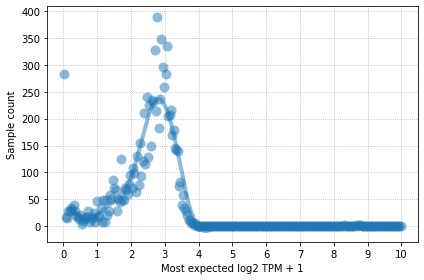

4.1499999999999995


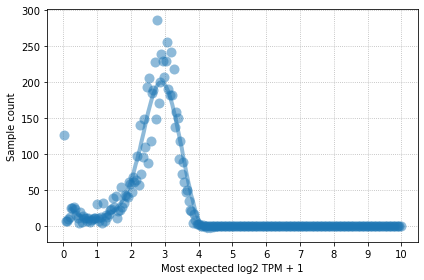

In [108]:
maximal_expression = most_likely_expr_norm, most_likely_expr_prim
infos = 'normal', 'primary'

margin = 5
for i in range(len(maximal_expression)):
    
    values = maximal_expression[i]
    info = infos[i]
    print(numpy.max(values))

    # histogram
    hist, bin_edges = numpy.histogram(values, bins=250, range=(0, 10))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]

    # curve fitting
    plotting_x = x[margin:-margin]
    plotting_hist = hist[margin:-margin]
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)

    plt.plot(x, hist, 'o', color='tab:blue', alpha=1/2, markeredgecolor='None', markersize=10)
    plt.plot(plotting_x, yhat, '-', lw=4, alpha=1/2, color='tab:blue')
    
    plt.xticks(range(0, 11))
    plt.grid(ls=':')
    plt.xlabel('Most expected log2 TPM + 1')
    plt.ylabel('Sample count')
    plt.tight_layout()
    plt.show()

In [129]:
#In the list, there are values for both group (7429 + 9185)
selected_samples_norm = [i for i in selected_samples if i.startswith('GTEX')]
print(len(selected_samples_norm))

selected_samples_prim = [i for i in selected_samples if i.startswith('TCGA')]
print(len(selected_samples_prim))

5914
8022


In [132]:
dfs = ensembl_normal_protcoding, ensembl_primary_protcoding
selected_samples_s = selected_samples_norm, selected_samples_prim

selected_expressions = []

for i in range(len(dfs)):
    df = dfs[i]
    selected_sampl = selected_samples_s[i]
    info = infos[i]  
    
    selected_expression = df.loc[:, selected_sampl]
    print(selected_expression.shape)
    selected_expression.head()
    selected_expressions.append(selected_expression)

selected_expr_normal = selected_expressions[0]
selected_expr_primary = selected_expressions[1]
selected_expr_normal.head(3)

(17993, 5914)
(18248, 8022)


sample,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2226-SM-5N9CH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-3026-SM-5GZYU,...,GTEX-ZZPU-0326-SM-5N9BJ,GTEX-ZZPU-0526-SM-5E44U,GTEX-ZZPU-0726-SM-5N9C8,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2726-SM-5NQ8O
ENSG00000198888,13.135160,14.671255,12.892590,12.626528,13.833999,13.796301,10.462722,11.971959,14.579059,13.647612,...,13.630914,13.258647,12.856694,14.807350,14.324070,14.077683,13.710608,12.875992,12.543841,14.322870
ENSG00000198763,12.621729,14.293172,12.661422,13.083466,14.178278,13.815800,11.522490,12.455857,14.316871,12.911187,...,13.608215,13.410832,13.035472,14.654956,14.349269,14.271173,14.243274,13.394134,12.824699,14.383067
ENSG00000198804,12.624828,14.599558,12.501049,11.333958,15.359034,12.269492,10.351304,11.283978,13.617715,14.068484,...,13.964490,13.839598,13.396634,15.990122,15.275036,15.172639,14.608458,13.524222,14.093182,14.397067


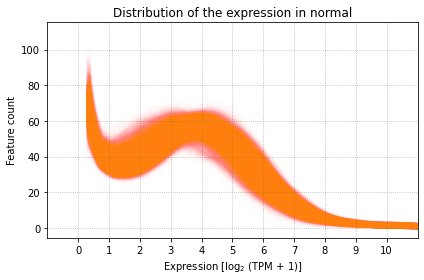

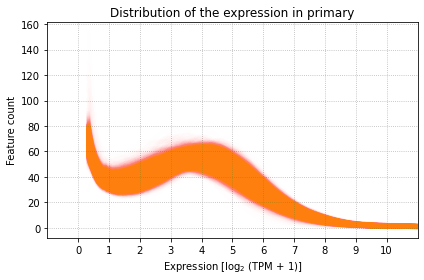

Wall time: 52.2 s


In [136]:
%%time
found_max = 19
#means 50 dots per bins
resolution = 50
number_of_bins = found_max * resolution
absolute_max = 0
#remove at extremities
margin = int(resolution/3)

dfs = selected_expr_normal, selected_expr_primary
infos = "normal", "primary"

most_likely_expressions = []
selected_samples = []

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]  

    for sample in df.columns:
        expression_values = df.loc[:, sample]

        # histogram
        hist, bin_edges = numpy.histogram(expression_values, bins=number_of_bins, range=(0, found_max))
        half_bin = (bin_edges[1] - bin_edges[0])/2
        x = bin_edges + half_bin
        x = x[:-1]

        # curve fitting - smooth
        plotting_x = x[margin:-margin]
        plotting_hist = hist[margin:-margin]
        yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
               
        # plotting
        plt.plot(plotting_x, yhat, '-', lw=4, alpha=1/300, color='tab:orange')

    plt.xlim(-1, 11)                  
    plt.xticks(range(0, 10+1))
    plt.title(f'Distribution of the expression in {info}')
    plt.xlabel('Expression [log$_2$ (TPM + 1)]')
    plt.ylabel('Feature count')
    plt.grid(ls=':')
    plt.tight_layout()
    plt.show()
    plt.close()

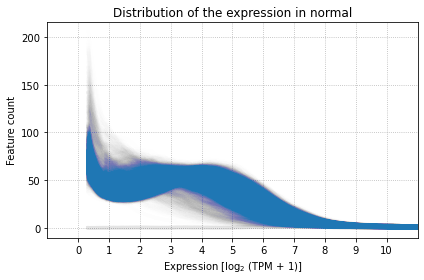

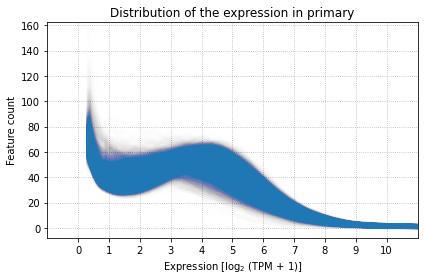

Wall time: 1min 4s


In [137]:
%%time
found_max = 19
#means 50 dots per bins
resolution = 50
number_of_bins = found_max * resolution
absolute_max = 0
#remove at extremities
margin = int(resolution/3)

dfs = ensembl_normal_protcoding, ensembl_primary_protcoding
infos = "normal", "primary"

most_likely_expressions = []
selected_samples = []

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]  

    for sample in df.columns:
        expression_values = df.loc[:, sample]

        # histogram
        hist, bin_edges = numpy.histogram(expression_values, bins=number_of_bins, range=(0, found_max))
        half_bin = (bin_edges[1] - bin_edges[0])/2
        x = bin_edges + half_bin
        x = x[:-1]

        # curve fitting - smooth
        plotting_x = x[margin:-margin]
        plotting_hist = hist[margin:-margin]
        yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
        
        # determine most likely expression
        ## argmax gives position of the max. This is to select samples with max at this range
        most_likely_expression = x[numpy.argmax(yhat)]
        most_likely_expressions.append(most_likely_expression)

        # sample selection
        if 1.8 <= most_likely_expression <= 3.8:
            selected_samples.append(sample)
        
        # plotting
        plt.plot(plotting_x, yhat, '-', lw=4, alpha=1/300, color='tab:blue')

    plt.xlim(-1, 11)                  
    plt.xticks(range(0, 10+1))
    plt.title(f'Distribution of the expression in {info}')
    plt.xlabel('Expression [log$_2$ (TPM + 1)]')
    plt.ylabel('Feature count')
    plt.grid(ls=':')
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
%%time
# DL data gene expression for Normal Tissue and Primary Tumors
path = output_file_directory + "dataframes_for_input/"
ensembl_normal_protcoding = pandas.read_csv(path+"ensembl_normal_protcoding_expr.tsv", sep = "\t")
# ensembl_primary_protcoding = pandas.read_csv(path+"ensembl_primary_protcoding_expr.tsv", sep = "\t")

print(ensembl_normal_protcoding.shape)
# print(ensembl_primary_protcoding.shape)

ensembl_normal_protcoding.head()

In [ ]:
dfs =  ensembl_normal_protcoding, ensembl_primary_protcoding

for df in dfs:
    df.set_index('sample', inplace = True)    

# transform data to tpm + 1   
    print(f'\n min inlog2(tpm+0.001) : {df.min().min()}')
    df = ((2**df) - 0.001) + 1
    print(f'min in tpm+1 : {df.min().min()}')
    df = numpy.log2(df) 
    print(f'min in log2(tpm+1) : {df.min().min()}')
    
ensembl_normal_protcoding.head(2)

In [ ]:
dfs =  ensembl_normal_protcoding, ensembl_primary_protcoding
infos = 'normal', 'primary'

df_L = []
for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    
    print(f'\n {info.upper()} \nshape is: {df.shape}')
    #remove gene where the maximum is lower than 10 TPM 
    max_number_log2_tpm_p1 = 3.322
    df = df.loc[:, (df.max() > max_number_log2_tpm_p1)]
    print(f'minimum of the max expression is {df.max().min()} [log2(tpm+1)]')
    print(f'new shape is: {df.shape}')
    df_L.append(df)

ensembl_normal_protcoding = df_L[0].T
ensembl_primary_protcoding = df_L[1].T

In [ ]:
# find max
print(ensembl_normal_protcoding.max().max())
print(ensembl_primary_protcoding.max().max())

In [ ]:
%%time
dfs = ensembl_normal_protcoding 
for df in dfs:

    found_max = 19
    resolution = 50
    number_of_bins = found_max * resolution
    absolute_max = 0
    margin = int(resolution/3)

    most_likely_expressions = []

    selected_samples = []

    for sample in ensembl_normal_protcoding.columns:
        expression_values = ensembl_normal_protcoding.loc[:, sample]

        # histogram
        hist, bin_edges = numpy.histogram(expression_values, bins=number_of_bins, range=(0, found_max))
        half_bin = (bin_edges[1] - bin_edges[0])/2
        x = bin_edges + half_bin
        x = x[:-1]

        # curve fitting
        plotting_x = x[margin:-margin]
        plotting_hist = hist[margin:-margin]
        yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)

        # determine most likely expression
        most_likely_expression = x[numpy.argmax(yhat)]
        most_likely_expressions.append(most_likely_expression)

        # sample selection
        if 1 <= most_likely_expression <= 2:
            selected_samples.append(sample)

        # plotting
        plt.plot(plotting_x, yhat, '-', lw=4, alpha=1/300, color='tab:blue')

        # check
        if numpy.max(expression_values) > absolute_max:
            absolute_max = numpy.max(expression_values)

    # check print
    print(absolute_max)
    print(len(selected_samples))

    plt.xlim(-1, 11)                  
    plt.xticks(range(0, 10+1))
    plt.xlabel('Expression [log$_2$ (TPM + 1)]')
    plt.ylabel('Feature count')
    plt.grid(ls=':')
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
ensembl_normal_protcoding.T

In [ ]:
%%time
dfs = ensembl_normal_protcoding, ensembl_primary_protcoding
for df in dfs:

    found_max = 19
    resolution = 25
    number_of_bins = found_max * resolution
    absolute_max = 0
    margin = int(resolution/3)

    most_likely_expressions = []

    selected_samples = []

    for sample in ensembl_normal_protcoding.columns:
        expression_values = ensembl_normal_protcoding.loc[:, sample]

        # histogram
        hist, bin_edges = numpy.histogram(expression_values, bins=number_of_bins, range=(0, found_max))
        half_bin = (bin_edges[1] - bin_edges[0])/2
        x = bin_edges + half_bin
        x = x[:-1]

        # curve fitting
        plotting_x = x[margin:-margin]
        plotting_hist = hist[margin:-margin]
        yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)

        # determine most likely expression
        most_likely_expression = x[numpy.argmax(yhat)]
        most_likely_expressions.append(most_likely_expression)

        # sample selection
        if 1 <= most_likely_expression <= 2:
            selected_samples.append(sample)

        # plotting
        plt.plot(plotting_x, yhat, '-', lw=4, alpha=1/300, color='tab:blue')

        # check
        if numpy.max(expression_values) > absolute_max:
            absolute_max = numpy.max(expression_values)

    # check print
    print(absolute_max)
    print(len(selected_samples))

    plt.xlim(-1, 11)                  
    plt.xticks(range(0, 10+1))
    plt.xlabel('Expression [log$_2$ (TPM + 1)]')
    plt.ylabel('Feature count')
    plt.grid(ls=':')
    plt.tight_layout()
    plt.show()
    plt.close()

# II] ATG7 isoforms + Whole gene expression (ensembl)

In [ ]:
#Preparation of the global dataframe with ATG7 isoform expression AND whole gene expression
data = [[ensembl_normal_protcoding, df_ATG7_Normal], [ensembl_primary_protcoding, df_ATG7_Primary]]

df_final = []

for df in data:
    #Merge the two df to have ATG7 isoform expression + whole gene expression 
  df_merged = pandas.merge(df[1], df[0], on= 'sample')

  #delete the sample column and select column
  df_merged = df_merged.drop("sample", 1)
  df_merged = df_merged.drop(df_merged.columns[5:19], axis=1)
  
  #save in list
  df_final.append(df_merged)

ensembl_normal_protcoding_atg7_expr = df_final[0]
ensembl_primary_protcoding_atg7_expr = df_final[1]

print(ensembl_normal_protcoding_atg7_expr.shape)
print(ensembl_primary_protcoding_atg7_expr.shape)
ensembl_normal_protcoding_atg7_expr.head()

In [ ]:
#save to csv
path = 'ATG7/dataframes_for_input/'
ensembl_normal_protcoding_atg7_expr.to_csv(output_file_directory+path+'ensembl_normal_atg7_proteinGE.tsv',sep = "\t", index=False)
ensembl_primary_protcoding_atg7_expr.to_csv(output_file_directory+path+'ensembl_primary_atg7_proteinGE.tsv',sep = "\t", index=False)

## B) ATG7 isoforms + Whole gene expression (symbol)

In [ ]:
%%time
# DL data gene expression for Normal Tissue and Primary Tumors
path = output_file_directory + "/ATG7/dataframes_for_input/"
symbol_normal_protcoding = pandas.read_csv(path+"symbol_normal_protcoding_expr.tsv", sep = "\t")
symbol_primary_protcoding = pandas.read_csv(path+"symbol_primary_protcoding_expr.tsv", sep = "\t")

print(symbol_normal_protcoding.shape)
print(symbol_primary_protcoding.shape)

symbol_primary_protcoding.head()

In [ ]:
#Preparation of the global dataframe with ATG7 isoform expression AND whole gene expression
data = [[symbol_normal_protcoding, df_ATG7_Normal], [symbol_primary_protcoding, df_ATG7_Primary]]

df_final = []

for df in data:
    #Merge the two df to have ATG7 isoform expression + whole gene expression 
  df_merged = pandas.merge(df[1], df[0], on= 'sample')

  #delete the sample column and select column
  df_merged = df_merged.drop("sample", 1)
  df_merged = df_merged.drop(df_merged.columns[5:19], axis=1)
  
  #save in list
  df_final.append(df_merged)

symbol_normal_protcoding_atg7_expr = df_final[0]
symbol_primary_protcoding_atg7_expr = df_final[1]

print(symbol_normal_protcoding_atg7_expr.shape)
print(symbol_primary_protcoding_atg7_expr.shape)
symbol_normal_protcoding_atg7_expr.head()

In [ ]:
#Why ATG7_x ?
verif = symbol_normal_protcoding_atg7_expr[symbol_normal_protcoding_atg7_expr.columns[pandas.Series(symbol_normal_protcoding_atg7_expr.columns).str.startswith('ATG7')]]
print(verif.head(2))

In [ ]:
data = [symbol_normal_protcoding_atg7_expr, symbol_primary_protcoding_atg7_expr]

for df in data:
    df.drop('ATG7_y', axis = 1, inplace=True) 
    df.rename(columns = {'ATG7_x' : 'ATG7'}, inplace=True)
    verif = df[df.columns[pandas.Series(df.columns).str.startswith('ATG7')]]
    print(verif.head(2))

In [ ]:
#save to csv
path = 'ATG7/dataframes_for_input/'
symbol_normal_protcoding_atg7_expr.to_csv(output_file_directory+path+'symbol_normal_atg7_ProteinGE.tsv',sep = "\t", index=False)
symbol_primary_protcoding_atg7_expr.to_csv(output_file_directory+path+'symbol_primary_atg7_ProteinGE.tsv',sep = "\t", index=False)